# <div align="center"> Assignment 2 </div>

###  <div align="center"> Sumeth Lokuliyana (s3904996) </div>
###  <div align="center"> Janak Datta Velagapudi (s3903576) </div>

## <div align="center"> Classify Images based on Cancerous cells or not  </div>







### * As for this section we will be predicting images of cancer cells if they are cancerous or not .

### Import required packages 

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import pandas as pd
import cv2
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.optimizers import RMSprop ,Adadelta ,SGD ,Adamax
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import  ModelCheckpoint , EarlyStopping
from keras.losses import binary_crossentropy
import matplotlib.pyplot as plt
from keras.metrics import Precision, Recall, AUC 
from sklearn.metrics import confusion_matrix
from keras.applications import VGG16

### Reading the CSV file and the images into a DataFrame .

##### The images are first read using the cv2 read and then appends it to an array . Similarly we add the image path to the dataframe as well.

In [2]:
main_csv_file = "data_labels_mainData.csv"
extra_csv_file ="data_labels_extraData.csv"
df = pd.read_csv(main_csv_file)
extra_df = pd.read_csv(extra_csv_file)

# Read the images from the directory and convert them to arrays
image_dir = "patch_images"
image_arrays = []
image_path=[]
for image_name in df["ImageName"]:
    img_pth = image_dir + "/" + image_name
    image_path.append(img_pth)
    img = cv2.imread(os.path.join(image_dir, image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_arrays.append(img)
image_arrays = np.array(image_arrays)

#Merge the image arrays with the CSV dataframe
df["image_data"] = list(image_arrays)
df["image_path"] = image_path
df

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_data,image_path
0,22405,1,22405.png,fibroblast,0,0,"[[[242, 213, 237], [239, 209, 233], [235, 205,...",patch_images/22405.png
1,22406,1,22406.png,fibroblast,0,0,"[[[221, 175, 211], [224, 175, 211], [233, 184,...",patch_images/22406.png
2,22407,1,22407.png,fibroblast,0,0,"[[[247, 243, 247], [248, 242, 246], [247, 239,...",patch_images/22407.png
3,22408,1,22408.png,fibroblast,0,0,"[[[243, 242, 242], [243, 241, 241], [243, 241,...",patch_images/22408.png
4,22409,1,22409.png,fibroblast,0,0,"[[[189, 130, 189], [186, 126, 184], [187, 126,...",patch_images/22409.png
...,...,...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1,"[[[171, 138, 180], [217, 186, 228], [252, 224,...",patch_images/1625.png
9892,1626,60,1626.png,epithelial,2,1,"[[[212, 173, 228], [185, 145, 207], [164, 124,...",patch_images/1626.png
9893,1627,60,1627.png,epithelial,2,1,"[[[175, 141, 193], [196, 168, 209], [214, 188,...",patch_images/1627.png
9894,1628,60,1628.png,epithelial,2,1,"[[[227, 202, 232], [176, 146, 193], [183, 146,...",patch_images/1628.png


### Splitting the data into `Train` and `Test` sets


##### Initially we create a df of features that has the cellTypeName , celltype ,  the image data and the image path . We also create a df for the target variable Y which is "isCancerous" contains 1 or 0 if the image is cancerous or not. 

In [3]:

df = df.drop("ImageName", axis=1)
df = df.drop("InstanceID",axis=1)
df = df.drop("patientID",axis=1)
X_train, X_test = train_test_split(df, train_size=0.8, random_state=42)
X_test, X_val = train_test_split(X_test, test_size=0.2, random_state=42)
display(df)
display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

,cellTypeName,cellType,isCancerous,image_data,image_path
0,fibroblast,0,0,"[[[242, 213, 237], [239, 209, 233], [235, 205,...",patch_images/22405.png
1,fibroblast,0,0,"[[[221, 175, 211], [224, 175, 211], [233, 184,...",patch_images/22406.png
2,fibroblast,0,0,"[[[247, 243, 247], [248, 242, 246], [247, 239,...",patch_images/22407.png
3,fibroblast,0,0,"[[[243, 242, 242], [243, 241, 241], [243, 241,...",patch_images/22408.png
4,fibroblast,0,0,"[[[189, 130, 189], [186, 126, 184], [187, 126,...",patch_images/22409.png
...,...,...,...,...,...
9891,epithelial,2,1,"[[[171, 138, 180], [217, 186, 228], [252, 224,...",patch_images/1625.png
9892,epithelial,2,1,"[[[212, 173, 228], [185, 145, 207], [164, 124,...",patch_images/1626.png
9893,epithelial,2,1,"[[[175, 141, 193], [196, 168, 209], [214, 188,...",patch_images/1627.png
9894,epithelial,2,1,"[[[227, 202, 232], [176, 146, 193], [183, 146,...",patch_images/1628.png


(7916, 5)

(1584, 5)

(396, 5)

#### We will now check the distribution of `Cancerous` and `Non-Cancerous` cells 
##### From the graph below we can say that there are more `Non-cancerous` cells.

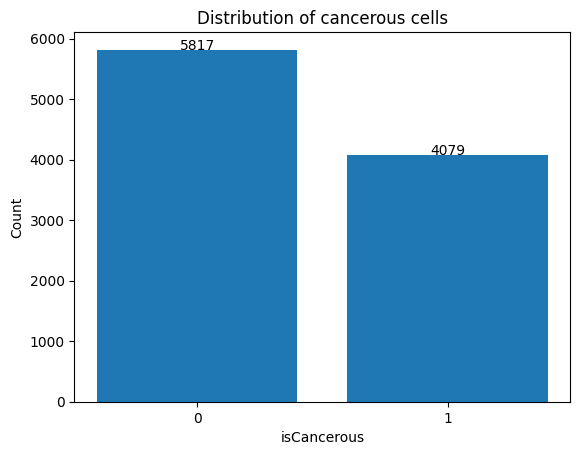

In [4]:
target_counts = df["isCancerous"].value_counts()
plt.bar([0,1], target_counts.values)
plt.xticks([0,1])
plt.title('Distribution of cancerous cells')
plt.xlabel('isCancerous')
plt.ylabel('Count')
for i, value in enumerate(target_counts.values):
    plt.text(i, value, str(value), ha='center')
plt.show()


We will plot a graph to figure out which type of cells are more prone to become cancerous

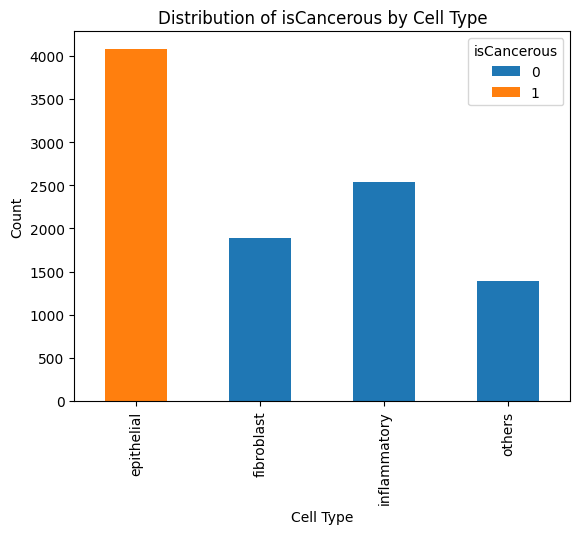

In [5]:
grouped = df.groupby(['isCancerous', 'cellTypeName'])['cellTypeName'].count().unstack('isCancerous')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.title('Distribution of isCancerous by Cell Type')
plt.show()


We will print out some random images to visualize

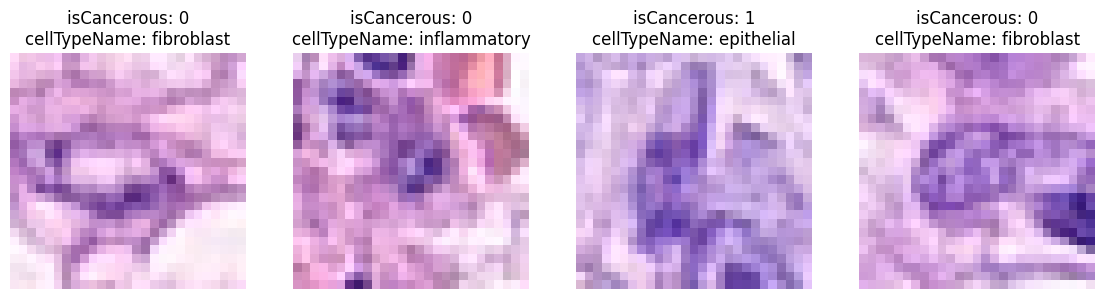

In [6]:
r_inx = np.random.choice(9896, 4)
rand_data = df.loc[r_inx,['image_path', 'isCancerous', 'cellTypeName']]

plt.figure(figsize=(14,4))
for i, (image_path, is_cancerous, cell_type) in enumerate(zip(rand_data['image_path'], rand_data['isCancerous'], rand_data['cellTypeName'])):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im)
    plt.title(f'isCancerous: {is_cancerous}\ncellTypeName: {cell_type}')
    plt.axis('off')
    
plt.show()


##  The Base Models

For the base model(s) well use just three layers , we will increment improvements on the best base model to gain a better accurcy and lower margin between the train and test data.
We will implement 
+ The `Flatten` layer - this will flatten the input image from a 3D shape (32x32x3) into a 1D array of 3072 elements.
+ The `Dense` layer It consists of 256 neurons which mean every neuron is connected every neuron in the previous layer.It uses sigmoid,softmax and relu as the activation functions.
+ The `Dense` layer This is the last output layer, which has 2 neurons and it determines if an input picture is cancerous or not. Seperate model uses the sigmoid.softmax,relu activation functions, which produces a value between 0 and 1 for each neuron, indicating the probability that the input picture belongs to that classification.

In [7]:
base_model_1 = Sequential([
    Flatten(input_shape=(27,27,3)),
    Dense(256, activation='softmax'),
    Dense(1 , activation='softmax')
])

base_model_2 = Sequential([
    Flatten(input_shape=(27,27,3)),
    Dense(256, activation='sigmoid'),
    Dense(1 , activation='sigmoid')
])

base_model_3 = Sequential([
    Flatten(input_shape=(27,27,3)),
    Dense(256, activation='relu'),
    Dense(1 , activation='relu')
])


In [8]:
base_model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 560,385
Trainable params: 560,385
Non-trainable params: 0
_________________________________________________________________


In [9]:
base_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2187)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               560128    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 560,385
Trainable params: 560,385
Non-trainable params: 0
_________________________________________________________________


In [10]:
base_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2187)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               560128    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 560,385
Trainable params: 560,385
Non-trainable params: 0
_________________________________________________________________


+ `optimizer='sgd'` -Stochastic gradient descent (SGD) is a popular optimization approach used for changing the neural network's weights and biases throughout the training period.
+ `loss=binary_crossentropy` - This is used beacuse the classification is between two classes (isCancerous or not)
+ `metrics=['accuracy']` - gives us the percentage of correctly predicted labels out of the total number of predictions made.

We then convert the integer values to string because the ImageDataGenerator takes in string values

In [11]:
base_model_1.compile(optimizer='sgd',
              loss=binary_crossentropy,
              metrics=['accuracy'])

base_model_2.compile(optimizer='sgd',
              loss=binary_crossentropy,
              metrics=['accuracy'])

base_model_3.compile(optimizer='sgd',
              loss=binary_crossentropy,
              metrics=['accuracy'])


X_train['isCancerous'] = X_train['isCancerous'].astype('str')
X_val['isCancerous'] = X_val['isCancerous'].astype('str')

X_train['cellType'] = X_train['cellType'].astype('str')
X_val['cellType'] = X_val['cellType'].astype('str')

X_test['isCancerous'] = X_test['isCancerous'].astype('str')
X_test['cellType'] = X_test['cellType'].astype('str')

## Setting up ImageDataGenerators 

+ The `image generators` will rescale(optional) the images pixel values by dividing them by 255
+ The `target_size` argument determines the size to which the photos will be downsized/upsized in this case we keep it the same
+ The `batch_size` parameter provides the number of images to include in each batch during training and validation
+ The `class_mode` parameter tells if  the labels are binary or not.

### Fitting the data given by the `ImageDataGenerators` to the base_models

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=X_train,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary')


validation_generator = val_datagen.flow_from_dataframe(
        dataframe=X_val,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary')   

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=X_test,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary')

base_1_history = base_model_1.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=1)
base_2_history = base_model_2.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=1)
base_3_history = base_model_3.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=1)

Found 7916 validated image filenames belonging to 2 classes.
Found 396 validated image filenames belonging to 2 classes.
Found 1584 validated image filenames belonging to 2 classes.
Epoch 1/100
248/248 [==============================] - 3s 12ms/step - loss: 0.6875 - accuracy: 0.4154 - val_loss: 0.6841 - val_accuracy: 0.4242
Epoch 2/100
248/248 [==============================] - 3s 12ms/step - loss: 0.6806 - accuracy: 0.4154 - val_loss: 0.6811 - val_accuracy: 0.4242
Epoch 3/100
248/248 [==============================] - 3s 11ms/step - loss: 0.6769 - accuracy: 0.4154 - val_loss: 0.6765 - val_accuracy: 0.4242
Epoch 4/100
248/248 [==============================] - 3s 12ms/step - loss: 0.6717 - accuracy: 0.4154 - val_loss: 0.6727 - val_accuracy: 0.4242
Epoch 5/100
248/248 [==============================] - 3s 11ms/step - loss: 0.6670 - accuracy: 0.4154 - val_loss: 0.6668 - val_accuracy: 0.4242
Epoch 6/100
248/248 [==============================] - 3s 12ms/step - loss: 0.6600 - accuracy: 0.4

## Graphs of Accuracy and Loss on Train and Validation data(base models)

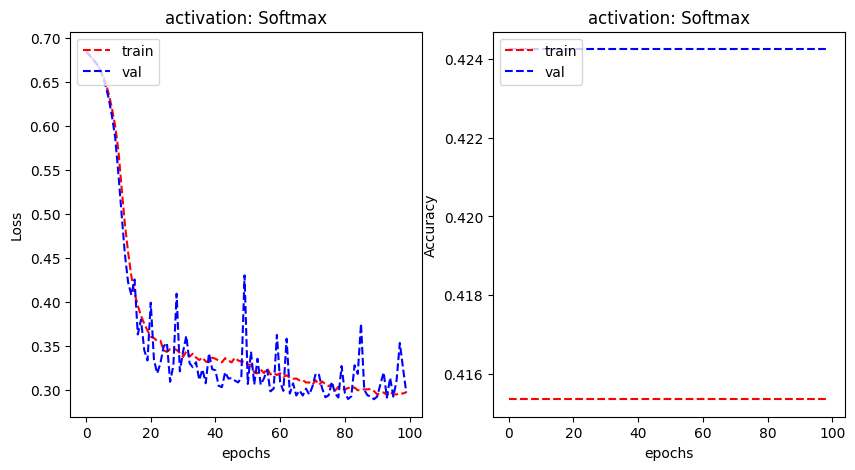

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(base_1_history.history['loss'], 'r--')
plt.plot(base_1_history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')
plt.title("activation: Softmax")

plt.subplot(1,2,2)
plt.plot(base_1_history.history['accuracy'], 'r--')
plt.plot(base_1_history.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.title("activation: Softmax")
plt.show()

plt.show()

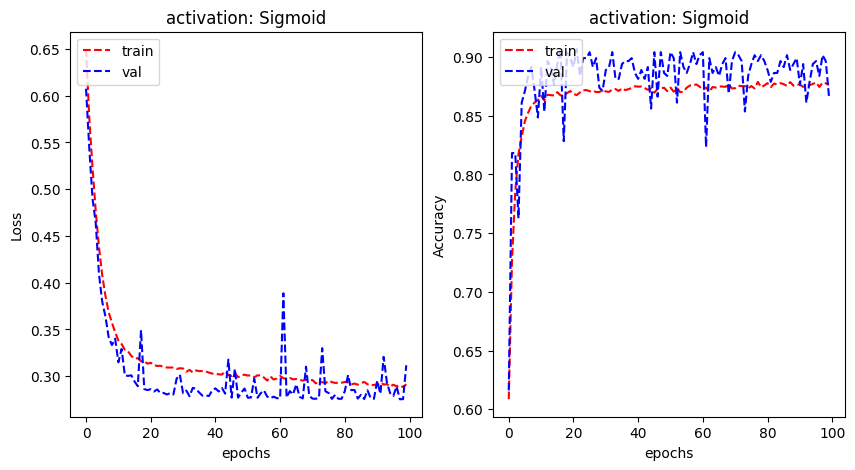

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(base_2_history.history['loss'], 'r--')
plt.plot(base_2_history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')
plt.title("activation: Sigmoid")

plt.subplot(1,2,2)
plt.plot(base_2_history.history['accuracy'], 'r--')
plt.plot(base_2_history.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.title("activation: Sigmoid")
plt.show()

plt.show()

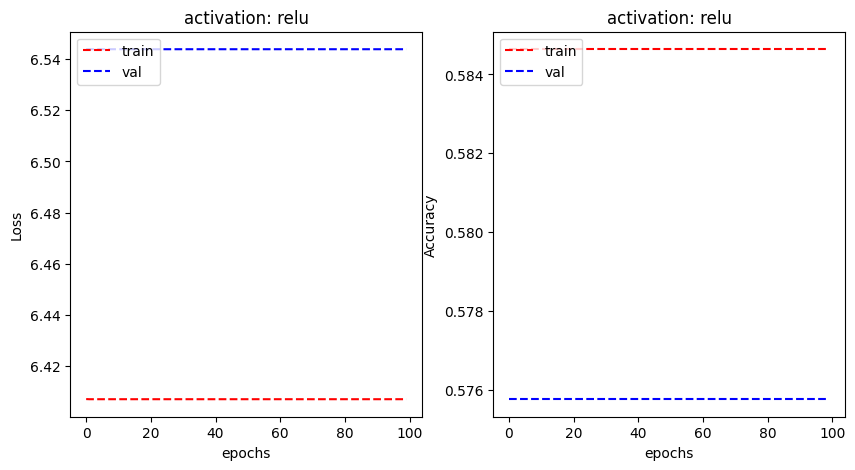

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(base_3_history.history['loss'], 'r--')
plt.plot(base_3_history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')
plt.title("activation: relu")

plt.subplot(1,2,2)
plt.plot(base_3_history.history['accuracy'], 'r--')
plt.plot(base_3_history.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.title("activation: relu")
plt.show()

plt.show()

From the above graphs we say that the `sigmoid function` performed better in this case , because the difference  between the train and the test data is minimal 
and the loss decrease gradually . 
+ The validation data has a better accuracy and a lower loss than the training data , this is because the model is too simple to grasp the features of the training data hence it is under fitting. 

In [16]:
base_model_1.evaluate(test_generator)
base_model_2.evaluate(test_generator)
base_model_3.evaluate(test_generator)

1584/1584 [==============================] - 2s 1ms/step - loss: 6.0667 - accuracy: 0.6067


[6.066731929779053, 0.6066918969154358]

### Regularization of the model 

This is done inorder to reduce the overfitting of the data as the validation accuracy is less than that of the training accuracy .

In [17]:
reg_lambda = 0.01
from keras.regularizers import l2

base_model_reg = Sequential([
    Flatten(input_shape=(27,27,3)),
    Dense(256,activation='sigmoid', kernel_regularizer=l2(reg_lambda)),
    Dense(1,activation='sigmoid')
])

base_model_reg.compile(optimizer=SGD(),
              loss=binary_crossentropy,
              metrics=['accuracy'])

history_reg = base_model_reg.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=1)

Epoch 1/100
248/248 [==============================] - 3s 12ms/step - loss: 5.0069 - accuracy: 0.6262 - val_loss: 4.7570 - val_accuracy: 0.6465
Epoch 2/100
248/248 [==============================] - 3s 11ms/step - loss: 4.5354 - accuracy: 0.7228 - val_loss: 4.3139 - val_accuracy: 0.8207
Epoch 3/100
248/248 [==============================] - 3s 11ms/step - loss: 4.1190 - accuracy: 0.7816 - val_loss: 3.9147 - val_accuracy: 0.8333
Epoch 4/100
248/248 [==============================] - 3s 11ms/step - loss: 3.7424 - accuracy: 0.8127 - val_loss: 3.5578 - val_accuracy: 0.8258
Epoch 5/100
248/248 [==============================] - 3s 11ms/step - loss: 3.4064 - accuracy: 0.8295 - val_loss: 3.2417 - val_accuracy: 0.8207
Epoch 6/100
248/248 [==============================] - 3s 11ms/step - loss: 3.1063 - accuracy: 0.8427 - val_loss: 3.0048 - val_accuracy: 0.7576
Epoch 7/100
248/248 [==============================] - 3s 11ms/step - loss: 2.8382 - accuracy: 0.8511 - val_loss: 2.7148 - val_accuracy:

## Graphs of Accuracy and Loss on Train and Validation data(regularized model)

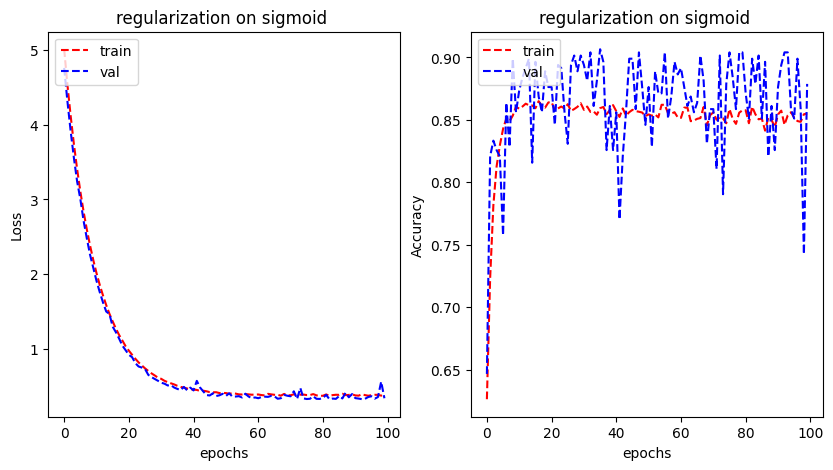

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_reg.history['loss'], 'r--')
plt.plot(history_reg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')
plt.title("regularization on sigmoid ")

plt.subplot(1,2,2)
plt.plot(history_reg.history['accuracy'], 'r--')
plt.plot(history_reg.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.title("regularization on sigmoid ")
plt.show()

plt.show()

- We can see that the loss of both the train and validation data are similar , but the accuracy is not , even though they end up on a similar accuracy at the end of 100 epochs , the fluctuation of the accuracy have to fixed , well try adding more layers .

### To reduce underfitting even further we will be adding more layers 

+ We need to make the model more complex inorder to reduce underfitting .
+ This can be done by adding more layers and add `Dropout` later on to prevent over fitting .
+ We dont add `Dropout` on this mdoel because it is not complex.


In [19]:
add_layers = Sequential([
    Flatten(input_shape=(27,27,3)),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

add_layers.compile(optimizer=SGD(),
              loss=binary_crossentropy,
              metrics=['accuracy'])

history_add_lyr = add_layers.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=1)

Epoch 1/100
248/248 [==============================] - 3s 12ms/step - loss: 0.6483 - accuracy: 0.6067 - val_loss: 0.6222 - val_accuracy: 0.5783
Epoch 2/100
248/248 [==============================] - 3s 11ms/step - loss: 0.5777 - accuracy: 0.7211 - val_loss: 0.5277 - val_accuracy: 0.7904
Epoch 3/100
248/248 [==============================] - 3s 11ms/step - loss: 0.4940 - accuracy: 0.8061 - val_loss: 0.4367 - val_accuracy: 0.8712
Epoch 4/100
248/248 [==============================] - 3s 11ms/step - loss: 0.4200 - accuracy: 0.8387 - val_loss: 0.3713 - val_accuracy: 0.8737
Epoch 5/100
248/248 [==============================] - 3s 10ms/step - loss: 0.3788 - accuracy: 0.8479 - val_loss: 0.4391 - val_accuracy: 0.7702
Epoch 6/100
248/248 [==============================] - 3s 11ms/step - loss: 0.3598 - accuracy: 0.8484 - val_loss: 0.3372 - val_accuracy: 0.8662
Epoch 7/100
248/248 [==============================] - 3s 11ms/step - loss: 0.3551 - accuracy: 0.8490 - val_loss: 0.3091 - val_accuracy:

### Graph of loss and accuracy  for the model with more layers

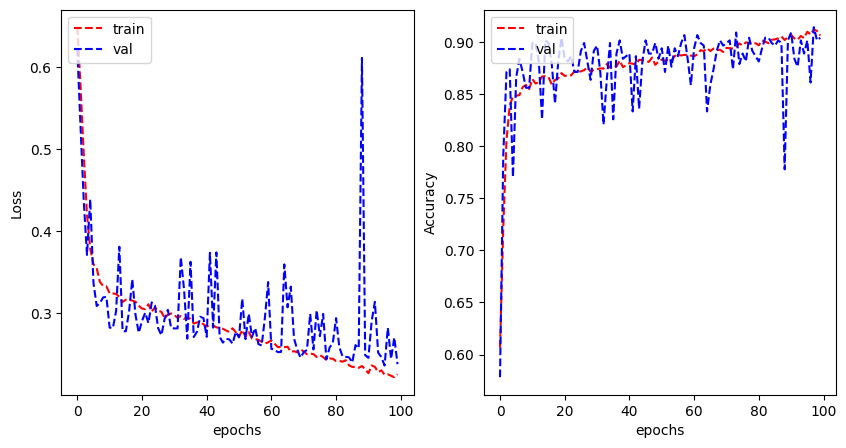

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_add_lyr.history['loss'], 'r--')
plt.plot(history_add_lyr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_add_lyr.history['accuracy'], 'r--')
plt.plot(history_add_lyr.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

### Evaluating  the models on the test data 
+ we evaluate the model with regularization and the one with more layers.

In [21]:
base_model_reg.evaluate(test_generator)
add_layers.evaluate(test_generator)

1584/1584 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.8883


[0.2739734947681427, 0.8882575631141663]

### Visualizing the prediction of the model(s) on Test data
+ The model with more layers
+ The regularized model
+ The base model

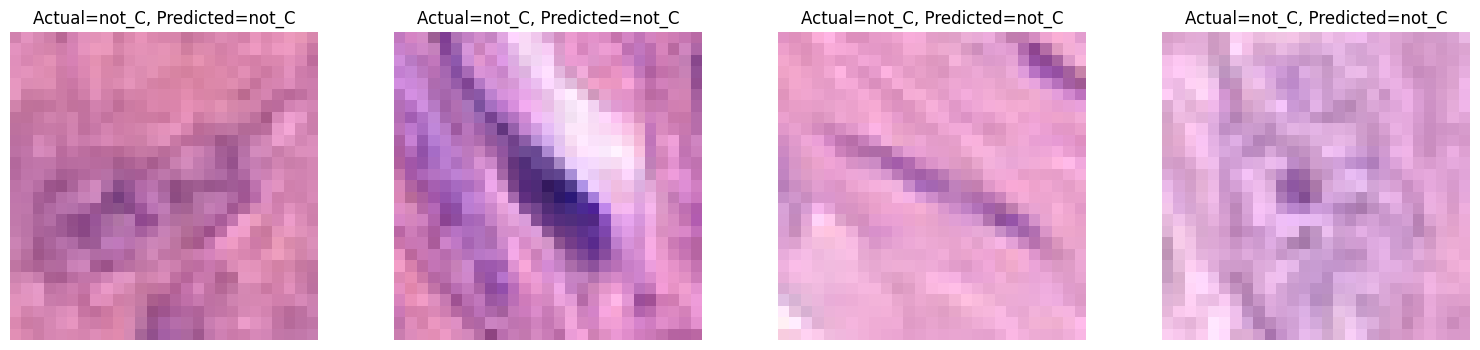

In [22]:
label_names = {0: 'not_C', 1: 'is_C'}
plt.figure(figsize=(19,4))
batches = 0
for x,y in test_generator:
    batches = batches + 1
    y_pred = add_layers.predict(x, verbose=0)
    x = np.squeeze(x)
    if batches <= 4:
        plt.subplot(1,4,batches)
        plt.imshow(x)
        plt.title("Actual={}, Predicted={}".format(label_names[int(y[0])], label_names[int(np.round(y_pred[0][0]))]))
    else:
        break
    plt.axis('off')
plt.show()


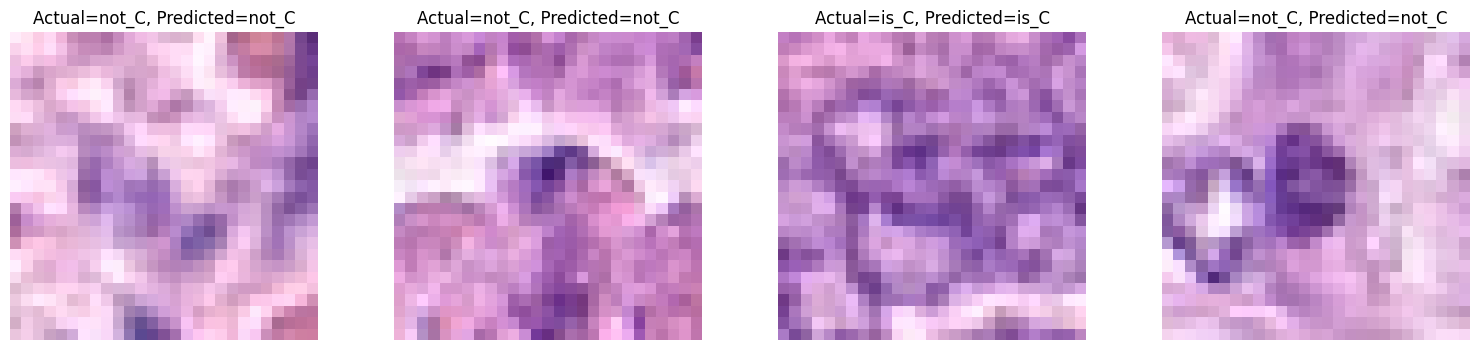

In [23]:
label_names = {0: 'not_C', 1: 'is_C'}
plt.figure(figsize=(19,4))
batches = 0
for x,y in test_generator:
    batches = batches + 1
    y_pred = base_model_reg.predict(x, verbose=0)
    x = np.squeeze(x)
    if batches <= 4:
        plt.subplot(1,4,batches)
        plt.imshow(x)
        plt.title("Actual={}, Predicted={}".format(label_names[int(y[0])], label_names[int(np.round(y_pred[0][0]))]))
    else:
        break
    plt.axis('off')
plt.show()


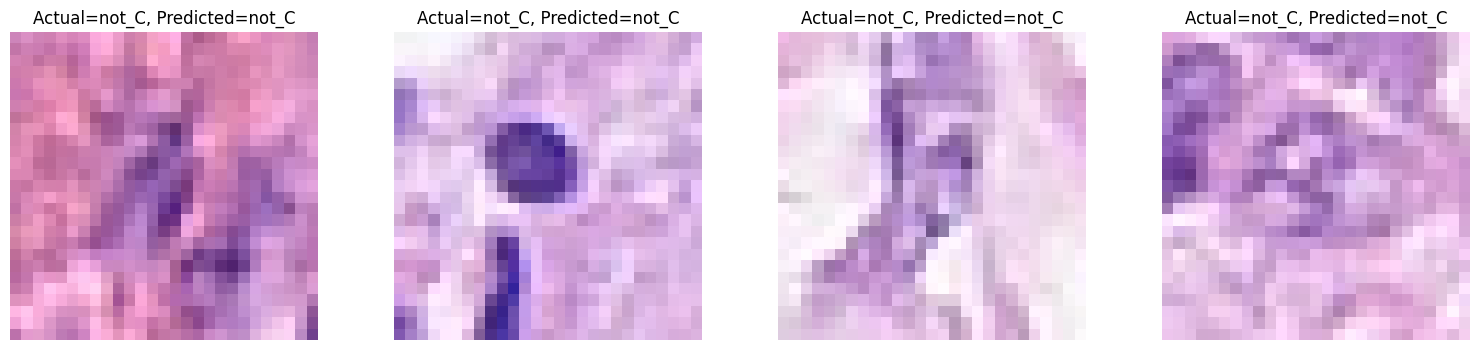

In [24]:
label_names = {0: 'not_C', 1: 'is_C'}
plt.figure(figsize=(19,4))
batches = 0
for x,y in test_generator:
    batches = batches + 1
    y_pred = base_model_2.predict(x, verbose=0)
    x = np.squeeze(x)
    if batches <= 4:
        plt.subplot(1,4,batches)
        plt.imshow(x)
        plt.title("Actual={}, Predicted={}".format(label_names[int(y[0])], label_names[int(np.round(y_pred[0][0]))]))
    else:
        break
    plt.axis('off')
plt.show()


### Adding more layers to the model 

+ We add more `Conv2D` layers and `Dense` layers , we will increase `Dropout` inorder to prevent the model from overfitting .
+ We use `Early Stopping` and `Model Checkpoint` in order to obtain the best model out of the 60 epoches running.

In [25]:
adv_model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(27, 27, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.15),
    Conv2D(128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),
    Conv2D(256, kernel_size=(3, 3), activation="relu"),
    Conv2D(512, kernel_size=(3, 3), activation="relu"),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath ='adv.model', monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=False,verbose=1)

adv_model.compile(optimizer=SGD(), loss=binary_crossentropy, metrics=['accuracy'])


history_adv = adv_model.fit(train_generator, validation_data = validation_generator, epochs=60, verbose=1,callbacks=[model_checkpoint,early_stopping])

Epoch 1/60
248/248 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.5845
Epoch 1: val_accuracy improved from -inf to 0.57576, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 20s 78ms/step - loss: 0.6802 - accuracy: 0.5845 - val_loss: 0.6792 - val_accuracy: 0.5758
Epoch 2/60
248/248 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.5846
Epoch 2: val_accuracy did not improve from 0.57576
248/248 [==============================] - 16s 64ms/step - loss: 0.6751 - accuracy: 0.5846 - val_loss: 0.6764 - val_accuracy: 0.5758
Epoch 3/60
248/248 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.5846
Epoch 3: val_accuracy did not improve from 0.57576
248/248 [==============================] - 16s 64ms/step - loss: 0.6711 - accuracy: 0.5846 - val_loss: 0.6705 - val_accuracy: 0.5758
Epoch 4/60
248/248 [==============================] - ETA: 0s - loss: 0.6600 - accuracy: 0.5846
Epoch 4: val_accuracy improved from 0.57576 to 0.58586, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 16s 66ms/step - loss: 0.6600 - accuracy: 0.5846 - val_loss: 0.6497 - val_accuracy: 0.5859
Epoch 5/60
248/248 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.6451
Epoch 5: val_accuracy improved from 0.58586 to 0.75253, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 16s 64ms/step - loss: 0.6169 - accuracy: 0.6451 - val_loss: 0.5491 - val_accuracy: 0.7525
Epoch 6/60
248/248 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.7346
Epoch 6: val_accuracy improved from 0.75253 to 0.83333, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 16s 64ms/step - loss: 0.5530 - accuracy: 0.7346 - val_loss: 0.4518 - val_accuracy: 0.8333
Epoch 7/60
248/248 [==============================] - ETA: 0s - loss: 0.4955 - accuracy: 0.7720
Epoch 7: val_accuracy improved from 0.83333 to 0.87121, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 16s 66ms/step - loss: 0.4955 - accuracy: 0.7720 - val_loss: 0.4129 - val_accuracy: 0.8712
Epoch 8/60
248/248 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.8007
Epoch 8: val_accuracy did not improve from 0.87121
248/248 [==============================] - 16s 65ms/step - loss: 0.4452 - accuracy: 0.8007 - val_loss: 0.3664 - val_accuracy: 0.8586
Epoch 9/60
248/248 [==============================] - ETA: 0s - loss: 0.4035 - accuracy: 0.8243
Epoch 9: val_accuracy improved from 0.87121 to 0.88131, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 17s 68ms/step - loss: 0.4035 - accuracy: 0.8243 - val_loss: 0.3147 - val_accuracy: 0.8813
Epoch 10/60
248/248 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.8303
Epoch 10: val_accuracy did not improve from 0.88131
248/248 [==============================] - 16s 63ms/step - loss: 0.3882 - accuracy: 0.8303 - val_loss: 0.4899 - val_accuracy: 0.7576
Epoch 11/60
248/248 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8384
Epoch 11: val_accuracy improved from 0.88131 to 0.89394, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 17s 67ms/step - loss: 0.3683 - accuracy: 0.8384 - val_loss: 0.3071 - val_accuracy: 0.8939
Epoch 12/60
248/248 [==============================] - ETA: 0s - loss: 0.3608 - accuracy: 0.8446
Epoch 12: val_accuracy improved from 0.89394 to 0.89899, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 17s 67ms/step - loss: 0.3608 - accuracy: 0.8446 - val_loss: 0.2804 - val_accuracy: 0.8990
Epoch 13/60
248/248 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8522
Epoch 13: val_accuracy did not improve from 0.89899
248/248 [==============================] - 16s 66ms/step - loss: 0.3520 - accuracy: 0.8522 - val_loss: 0.2860 - val_accuracy: 0.8914
Epoch 14/60
248/248 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.8583
Epoch 14: val_accuracy did not improve from 0.89899
248/248 [==============================] - 15s 60ms/step - loss: 0.3305 - accuracy: 0.8583 - val_loss: 0.2826 - val_accuracy: 0.8889
Epoch 15/60
248/248 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.8545
Epoch 15: val_accuracy did not improve from 0.89899
248/248 [==============================] - 15s 61ms/step - loss: 0.3366 - accuracy: 0.8545 - val_loss: 0.2540 - val_accuracy: 0.8939
Epoch 16/60
248/248 [

INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 16s 66ms/step - loss: 0.2790 - accuracy: 0.8845 - val_loss: 0.2175 - val_accuracy: 0.9192
Epoch 32/60
248/248 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.8896
Epoch 32: val_accuracy did not improve from 0.91919
248/248 [==============================] - 15s 62ms/step - loss: 0.2643 - accuracy: 0.8896 - val_loss: 0.2120 - val_accuracy: 0.9066
Epoch 33/60
248/248 [==============================] - ETA: 0s - loss: 0.2714 - accuracy: 0.8888
Epoch 33: val_accuracy did not improve from 0.91919
248/248 [==============================] - 16s 64ms/step - loss: 0.2714 - accuracy: 0.8888 - val_loss: 0.3546 - val_accuracy: 0.8182
Epoch 34/60
248/248 [==============================] - ETA: 0s - loss: 0.2595 - accuracy: 0.8924
Epoch 34: val_accuracy did not improve from 0.91919
248/248 [==============================] - 15s 62ms/step - loss: 0.2595 - accuracy: 0.8924 - val_loss: 0.3173 - val_accuracy: 0.8510
Epoch 35/60
248/248 [

INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 17s 67ms/step - loss: 0.2492 - accuracy: 0.8993 - val_loss: 0.1962 - val_accuracy: 0.9268
Epoch 43/60
248/248 [==============================] - ETA: 0s - loss: 0.2479 - accuracy: 0.9001
Epoch 43: val_accuracy did not improve from 0.92677
248/248 [==============================] - 15s 62ms/step - loss: 0.2479 - accuracy: 0.9001 - val_loss: 0.2430 - val_accuracy: 0.8939
Epoch 44/60
248/248 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.8978
Epoch 44: val_accuracy improved from 0.92677 to 0.93182, saving model to adv.model


INFO:tensorflow:Assets written to: adv.model\assets


INFO:tensorflow:Assets written to: adv.model\assets


248/248 [==============================] - 17s 67ms/step - loss: 0.2448 - accuracy: 0.8978 - val_loss: 0.1905 - val_accuracy: 0.9318
Epoch 45/60
248/248 [==============================] - ETA: 0s - loss: 0.2434 - accuracy: 0.9013
Epoch 45: val_accuracy did not improve from 0.93182
248/248 [==============================] - 15s 62ms/step - loss: 0.2434 - accuracy: 0.9013 - val_loss: 0.2416 - val_accuracy: 0.8965
Epoch 46/60
248/248 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.9013
Epoch 46: val_accuracy did not improve from 0.93182
248/248 [==============================] - 16s 63ms/step - loss: 0.2386 - accuracy: 0.9013 - val_loss: 0.4432 - val_accuracy: 0.7803
Epoch 47/60
248/248 [==============================] - ETA: 0s - loss: 0.2458 - accuracy: 0.8989
Epoch 47: val_accuracy did not improve from 0.93182
248/248 [==============================] - 15s 62ms/step - loss: 0.2458 - accuracy: 0.8989 - val_loss: 0.2782 - val_accuracy: 0.8737
Epoch 48/60
248/248 [

## Graph for loss and accuracy for the `Advanced model`

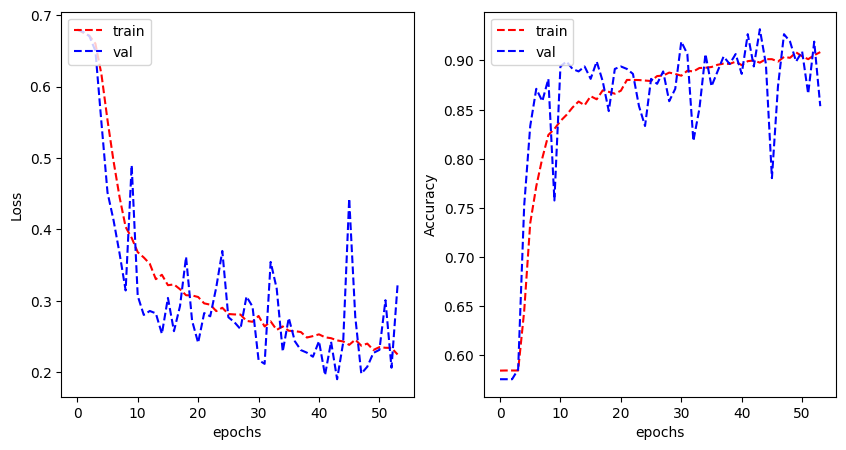

In [26]:
adv_model = load_model('adv.model')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_adv.history['loss'], 'r--')
plt.plot(history_adv.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_adv.history['accuracy'], 'r--')
plt.plot(history_adv.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

+ As we can see the under fitting is reduced by a certain amount but not completely . It was comparatively better than to how it was. The issue is that the validation accuracy and the loss in not constant it has too much fluctuation .

In [27]:
adv_model.evaluate(test_generator)

1584/1584 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9091


[0.25015881657600403, 0.9090909361839294]

## Visualising predictions using the `Advanced model` on the Test Data

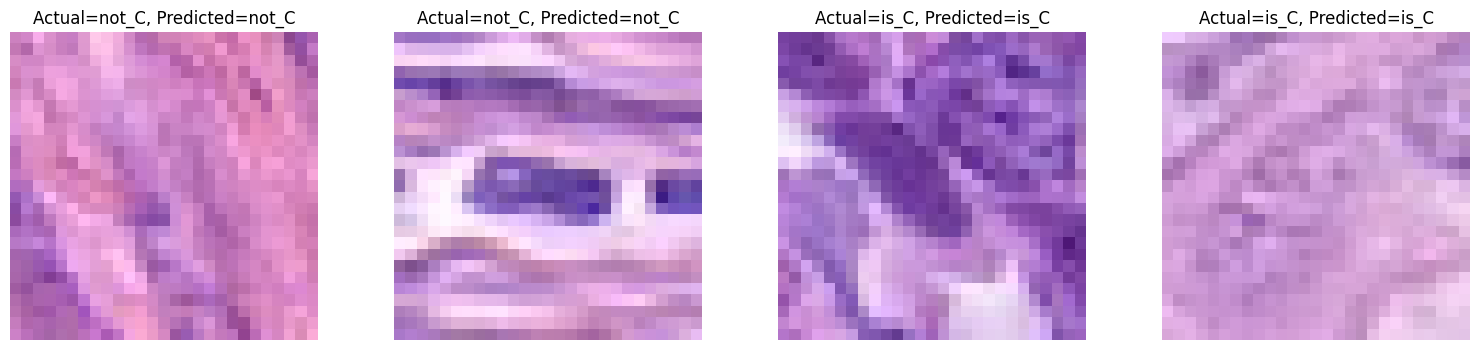

In [28]:
label_names = {0: 'not_C', 1: 'is_C'}
plt.figure(figsize=(19,4))
batches = 0
for x,y in test_generator:
    batches = batches + 1
    y_pred =adv_model.predict(x, verbose=0)
    x = np.squeeze(x)
    if batches <= 4:
        plt.subplot(1,4,batches)
        plt.imshow(x)
        plt.title("Actual={}, Predicted={}".format(label_names[int(y[0])], label_names[int(np.round(y_pred[0][0]))]))
    else:
        break
    plt.axis('off')
plt.show()


In [29]:
adv_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=binary_crossentropy,
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = adv_model.evaluate(test_generator)

# Get the predictions for the test set
y_pred = adv_model.predict(test_generator)

# Get the true labels for the test set
y_true = test_generator.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, np.round(y_pred))

# Print the evaluation metrics
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')
print(f'Test AUC-ROC score: {test_auc:.4f}')
print('Confusion matrix:\n', confusion_mtx)


1584/1584 [==============================] - 4s 2ms/step
Test loss: 0.2502
Test accuracy: 0.9091
Test precision: 0.8713
Test recall: 0.9021
Test AUC-ROC score: 0.9612
Confusion matrix:
 [[556 405]
 [383 240]]


## Alternate Base Model (using VGG16 ) (further testing )

In [30]:
from keras.applications import VGG16
# Create the base model using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

alt_train_generator = train_datagen.flow_from_dataframe(
        dataframe=X_train,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='binary')


alt_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=X_val,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='binary')   

batch_size = 1

alt_test_generator = test_datagen.flow_from_dataframe(
        dataframe=X_test,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='binary')

Found 7916 validated image filenames belonging to 2 classes.
Found 396 validated image filenames belonging to 2 classes.
Found 1584 validated image filenames belonging to 2 classes.


In [32]:
history_alt = model.fit(alt_train_generator, validation_data = alt_validation_generator, epochs=60, verbose=1)

Epoch 1/60
248/248 [==============================] - 19s 74ms/step - loss: 0.4704 - accuracy: 0.7678 - val_loss: 0.3863 - val_accuracy: 0.8182
Epoch 2/60
248/248 [==============================] - 17s 70ms/step - loss: 0.3957 - accuracy: 0.8197 - val_loss: 0.3705 - val_accuracy: 0.8182
Epoch 3/60
248/248 [==============================] - 18s 71ms/step - loss: 0.3792 - accuracy: 0.8286 - val_loss: 0.3439 - val_accuracy: 0.8308
Epoch 4/60
248/248 [==============================] - 18s 74ms/step - loss: 0.3668 - accuracy: 0.8351 - val_loss: 0.3454 - val_accuracy: 0.8333
Epoch 5/60
248/248 [==============================] - 18s 73ms/step - loss: 0.3589 - accuracy: 0.8420 - val_loss: 0.3227 - val_accuracy: 0.8687
Epoch 6/60
248/248 [==============================] - 18s 73ms/step - loss: 0.3604 - accuracy: 0.8398 - val_loss: 0.3370 - val_accuracy: 0.8359
Epoch 7/60
248/248 [==============================] - 18s 71ms/step - loss: 0.3513 - accuracy: 0.8396 - val_loss: 0.3200 - val_accuracy:

In [33]:
model.evaluate(alt_test_generator)

1584/1584 [==============================] - 13s 8ms/step - loss: 0.3762 - accuracy: 0.8617


[0.3762214779853821, 0.8617424368858337]

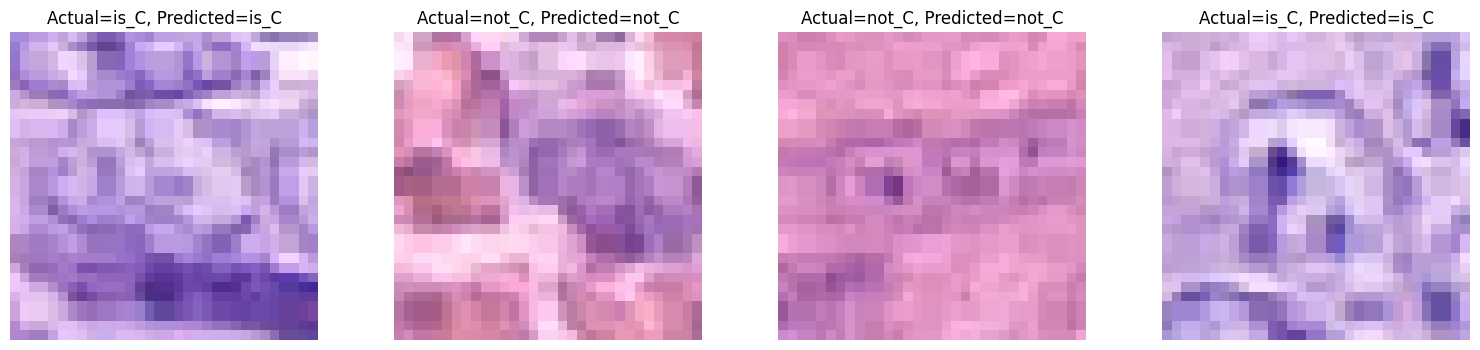

In [34]:
label_names = {0: 'not_C', 1: 'is_C'}
plt.figure(figsize=(19,4))
batches = 0
for x,y in alt_test_generator:
    batches = batches + 1
    y_pred =model.predict(x, verbose=0)
    x = np.squeeze(x)
    if batches <= 4:
        plt.subplot(1,4,batches)
        plt.imshow(x)
        plt.title("Actual={}, Predicted={}".format(label_names[int(y[0])], label_names[int(np.round(y_pred[0][0]))]))
    else:
        break
    plt.axis('off')
plt.show()


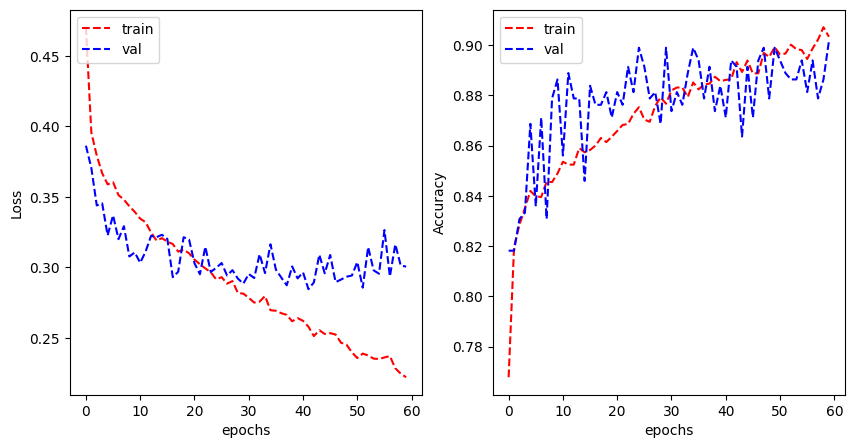

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_alt.history['loss'], 'r--')
plt.plot(history_alt.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_alt.history['accuracy'], 'r--')
plt.plot(history_alt.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()